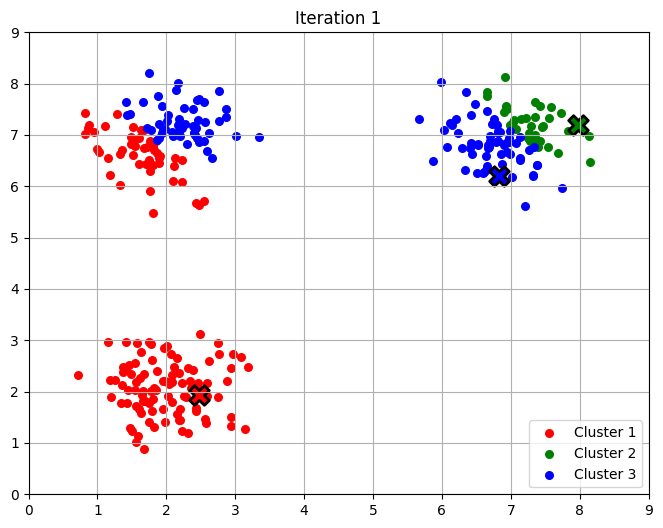

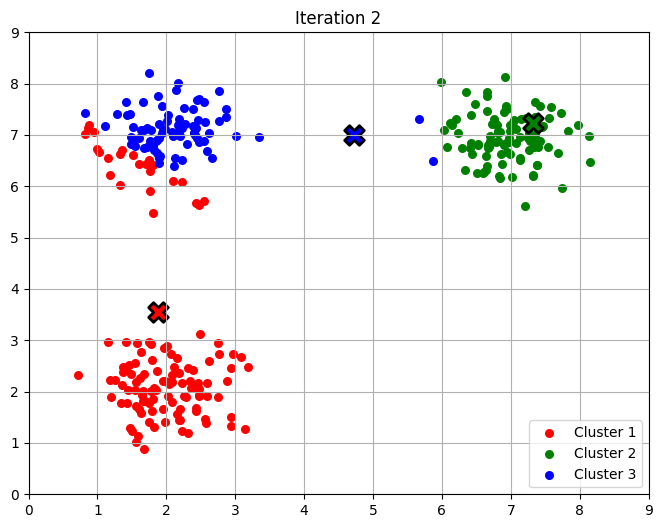

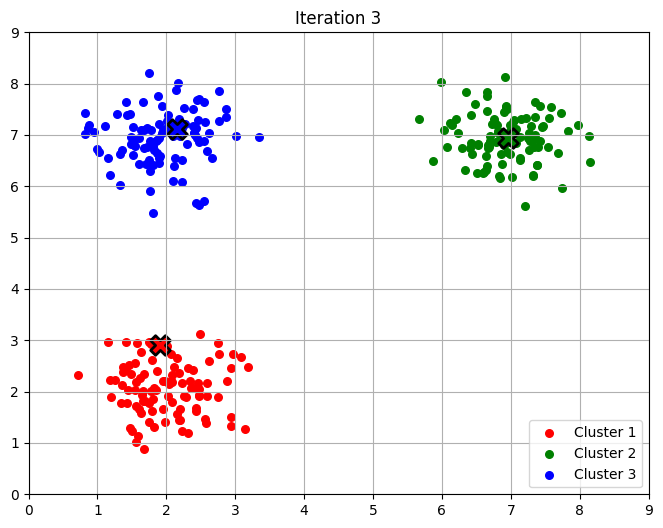

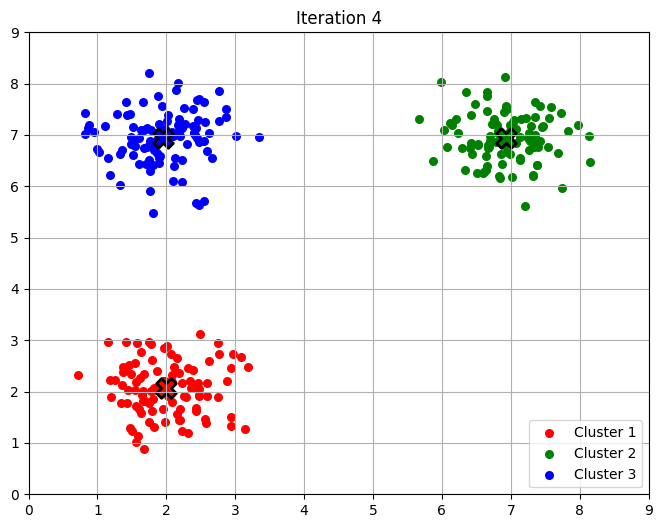

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
data = np.vstack((
    np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2)),
    np.random.normal(loc=[7, 7], scale=0.5, size=(100, 2)),
    np.random.normal(loc=[2, 7], scale=0.5, size=(100, 2))
))

# Number of clusters
k = 3

# Randomly initialize centroids
initial_centroids = data[np.random.choice(range(len(data)), k, replace=False)]

def k_means(data, initial_centroids):
    centroids = initial_centroids
    centroids_history = [centroids.copy()]
    iteration = 0

    while True:
        iteration += 1
        # Compute distances to centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        # Assign clusters
        labels = np.argmin(distances, axis=1)
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        centroids_history.append(centroids.copy())

    return labels, centroids_history

# Run K-means algorithm
labels, centroids_history = k_means(data, initial_centroids)

# Visualization for each iteration
colors = ['r', 'g', 'b']

for iteration, centroids in enumerate(centroids_history):
    plt.figure(figsize=(8, 6))
    plt.title(f'Iteration {iteration+1}')
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Plot data points
    for i in range(k):
        points = data[labels == i]
        plt.scatter(points[:, 0], points[:, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    
    # Plot centroids
    for idx, centroid in enumerate(centroids):
        plt.scatter(*centroid, s=200, color=colors[idx], marker='X', edgecolors='k', linewidths=2)
    
    plt.legend()
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.grid(True)
    plt.show()
